In [4]:
#Importing Libraries & Dependency 
import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#load dataset
data = pd.read_csv('../data/listings.csv')
data.head()

# dataset Shape & list of columns
print("Shape:", data.shape)
print("Columns:\n", data.columns.tolist())

Shape: (3818, 92)
Columns:
 ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_dep

In [17]:
# Cleaning target 'price' column (removed $ and commas) Converted to values to float
data['price'] = data['price'].replace('[\$,]','',regex=True).astype(float)
#Cleaned extra_people column as well
data['extra_people'] = data['extra_people'].replace('[\$,]','',regex=True).astype(float)
#Cleaned cleaning_fee column as well
data['cleaning_fee'] = data['cleaning_fee'].replace('[\$,]','',regex=True).astype(float)

In [21]:
#Checking Null Values & Column Types
missing_val = data.isnull().sum()
missing_val[missing_val > 0].sort_values(ascending=False)

license                        3818
square_feet                    3721
monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
last_review                     627
first_review                    627
reviews_per_month               627
space                           569
host_response_rate              523
host_response_time              523
neighbourhood                   416
xl_picture_url                  320
medium_url                      320
thumbnail_url               

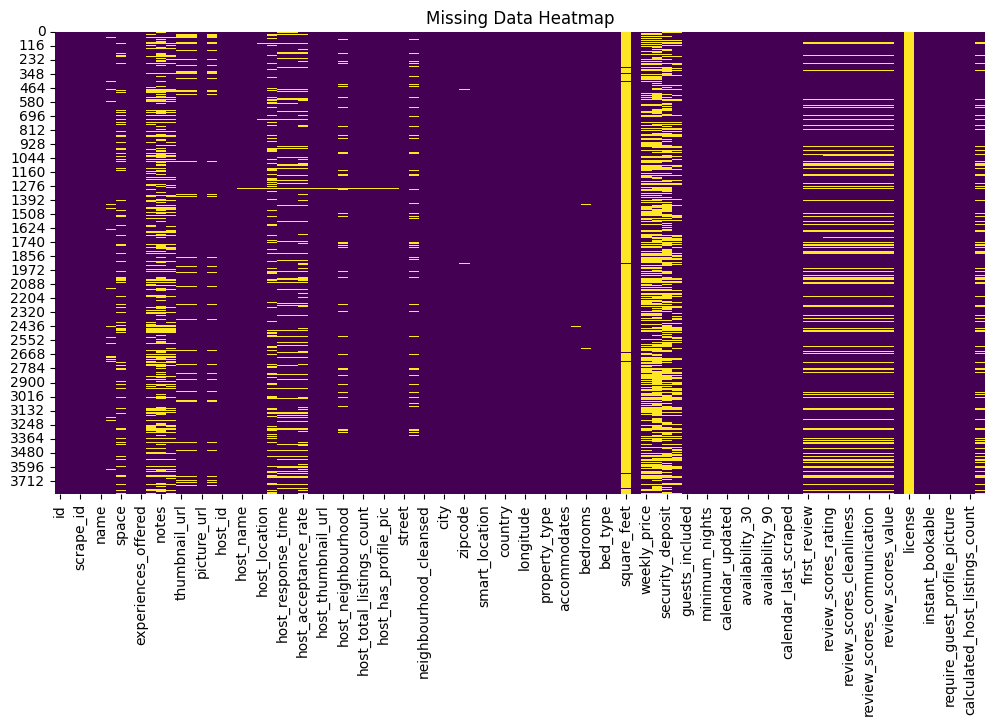

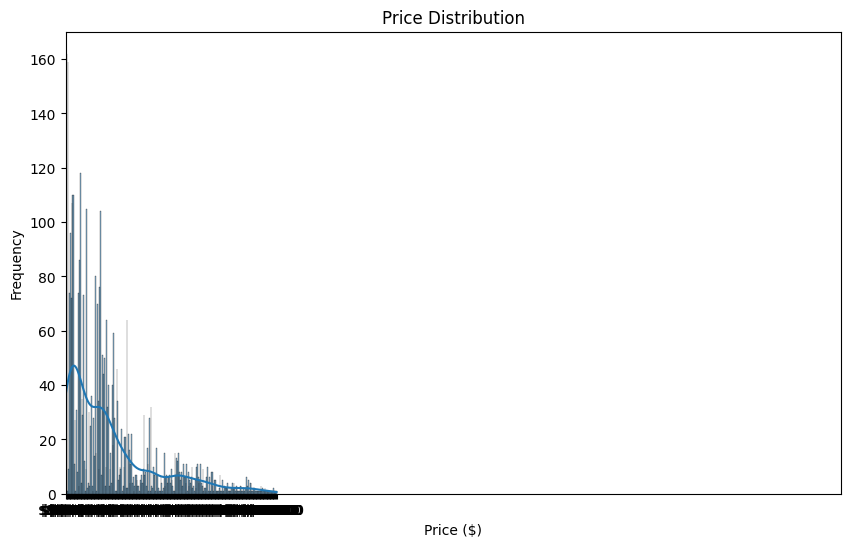

In [34]:
#Extras 
#Plotting missing_val for better reference
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

#Plot2 
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


In [39]:
#Feature Sampling
#Sampled few categorical and numerical variables.
data[['room_type', 'neighbourhood_group_cleansed', 'accommodates', 'bedrooms', 'bathrooms']].sample(5)


,room_type,neighbourhood_group_cleansed,accommodates,bedrooms,bathrooms
3460,Entire home/apt,Delridge,5,3.0,1.0
3129,Entire home/apt,Other neighborhoods,4,1.0,1.0
1659,Entire home/apt,Downtown,2,1.0,1.0
223,Entire home/apt,Queen Anne,4,2.0,2.0
687,Entire home/apt,University District,5,2.0,2.0


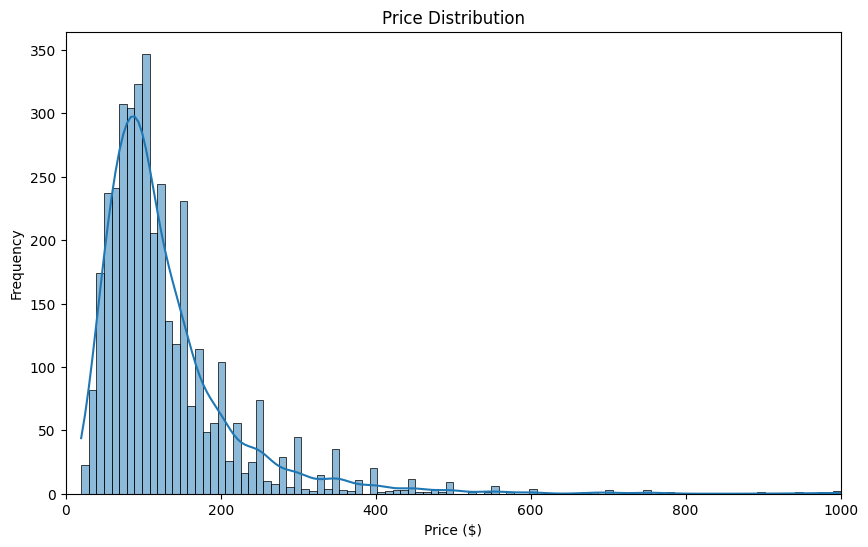

In [41]:
#To Understand Target variable Price distribution in given dataset
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

#Seems like right skewed data.

